# Import and Config

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from discofuzz.constants import SIMILARITY_METRICS
from discofuzz import FourierFuzzifier
from discofuzz import Visualizer

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU available: {gpus}")

# Define all available similarity metrics from FourierFuzzifier
sim_metrics_enum = [SIMILARITY_METRICS.COS, SIMILARITY_METRICS.W1, SIMILARITY_METRICS.W2, SIMILARITY_METRICS.Q]
sim_metrics = [s.value for s in sim_metrics_enum]
fuzzifier = FourierFuzzifier(
    sigma=0.05,
    kernel_size=16
)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\igeek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Fuzzification

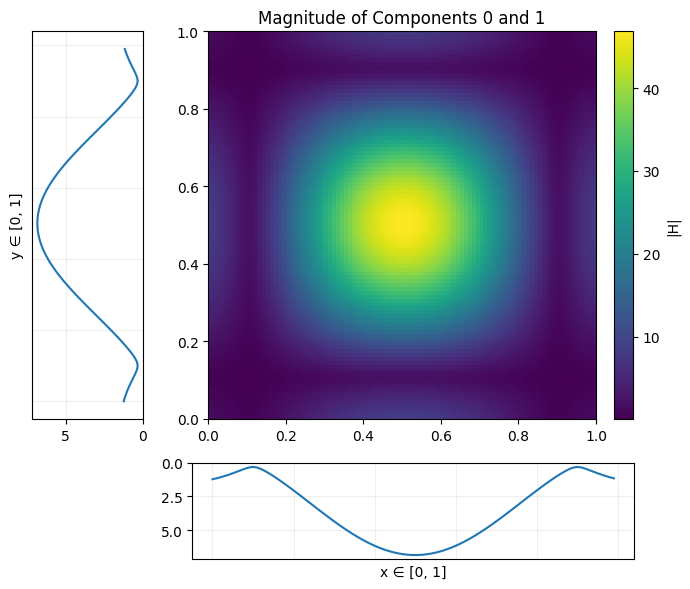

In [2]:
sample_pt = [0.5, 0.5]
fuzzy_sample = fuzzifier._get_gaussian_at_mu_batch(tf.constant(sample_pt))
visualizer = Visualizer(fuzzy_sample, 100, figsize=(7, 6))
visualizer.plot(view="magnitude")

# Fuzzy Set Operations

## Config

In [3]:
sample_points = [
    [0.25, 0.25],
    [0.25, 0.75],
    [0.75, 0.25],
    [0.75, 0.75],
]
fuzzy_sample_points = [
    fuzzifier._get_gaussian_at_mu_batch(tf.constant(pt))
    for pt in sample_points
]

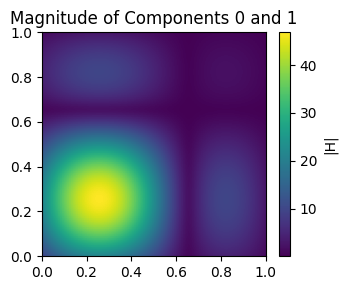

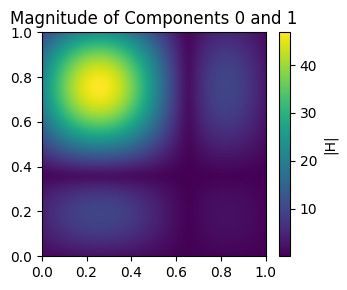

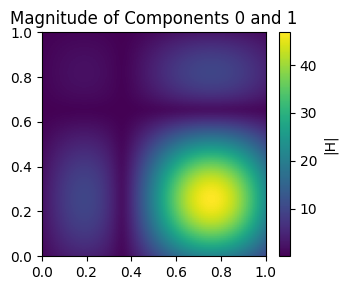

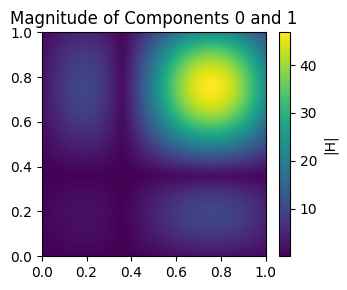

In [4]:
for fuzzy_pt in fuzzy_sample_points:
    Visualizer(fuzzy_pt, 100, figsize=(4, 3)).plot(view="magnitude", marginals=False)

## Fuzzy Set Operations

Fuzzy sample a:


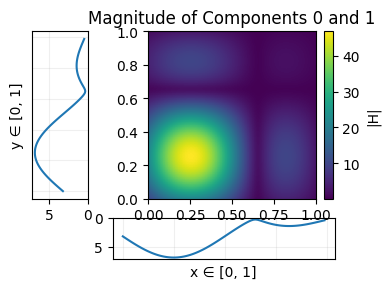

Fuzzy sample b:


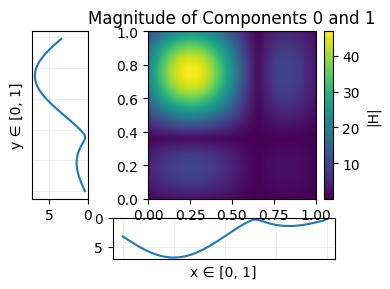

In [5]:
print("Fuzzy sample a:")
Visualizer(fuzzy_sample_points[0], 100, figsize=(4, 3)).plot(view="magnitude", marginals=True)
print("Fuzzy sample b:")
Visualizer(fuzzy_sample_points[1], 100, figsize=(4, 3)).plot(view="magnitude", marginals=True)

## Union

Union of a and b:
tf.Tensor(
[[ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]
 [ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.29072747+0.20250645j -0.34403843+0.12887186j -0.37776324+0.0411135j
  -0.38813278-0.05532698j -0.37294817-0.15399696j -0.3318524 

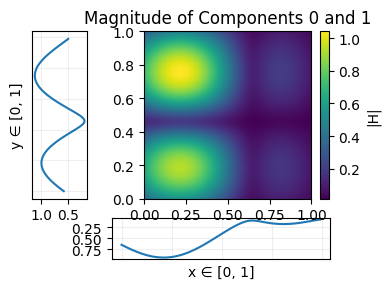

In [6]:
print("Union of a and b:")
a_union_b = fuzzifier.union_batch(fuzzy_sample_points[0], fuzzy_sample_points[1])
Visualizer(a_union_b, 100, figsize=(4, 3)).plot(view="magnitude", marginals=True)

## Intersection

Intersection of a and b:
tf.Tensor(
[[ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]
 [ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.29072747+0.20250645j -0.34403843+0.12887186j -0.37776324+0.0411135j
  -0.38813278-0.05532698j -0.37294817-0.15399696j -0.3

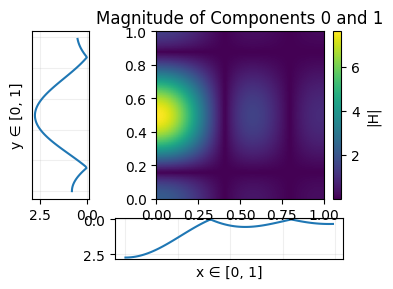

In [7]:
print("Intersection of a and b:")
a_intersect_b = fuzzifier.intersection_batch(fuzzy_sample_points[0], fuzzy_sample_points[1])
Visualizer(a_intersect_b, 100, figsize=(4, 3)).plot(view="magnitude", marginals=True)

Intersection of a and b intersected with itself:
tf.Tensor(
[[-0.12887278+0.08976642j -0.13346316+0.09296386j -0.13752773+0.09579503j
  -0.14100927+0.09822012j -0.14385787+0.10020431j -0.14603198+0.10171869j
  -0.14749962+0.10274097j -0.14823902+0.10325599j -0.14823902+0.10325599j
  -0.14749962+0.10274097j -0.14603198+0.10171869j -0.14385787+0.10020431j
  -0.14100927+0.09822012j -0.13752773+0.09579503j -0.13346316+0.09296386j
  -0.12887278+0.08976642j]
 [-0.08083939+0.21875244j -0.10142765+0.27446452j -0.0971754 +0.2629578j
  -0.0677141 +0.18323532j -0.01960222+0.05304389j  0.03520093-0.09525426j
   0.08250289-0.22325394j  0.10979911-0.29711786j  0.10979911-0.29711786j
   0.08250289-0.22325394j  0.03520093-0.09525426j -0.01960222+0.05304389j
  -0.0677141 +0.18323532j -0.0971754 +0.2629578j  -0.10142765+0.27446452j
  -0.08083939+0.21875244j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.12887278+0.08976642j -0.13346316+0.09296386j -0.13752773+0.09579503j
  -0.14100927+0.09822012j -0

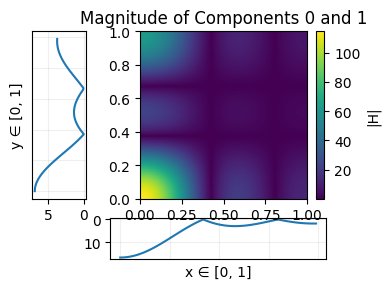

In [8]:
print("Intersection of a and b intersected with itself:")
a_intersect_b_2 = fuzzifier.intersection_batch(a_intersect_b, a_intersect_b)
Visualizer(a_intersect_b_2, 100, figsize=(4, 3)).plot(view="magnitude", marginals=True)

Intersection of a and b intersected with c:
tf.Tensor(
[[-0.12887278+0.08976642j -0.13346316+0.09296386j -0.13752773+0.09579503j
  -0.14100927+0.09822012j -0.14385787+0.10020431j -0.14603198+0.10171869j
  -0.14749962+0.10274097j -0.14823902+0.10325599j -0.14823902+0.10325599j
  -0.14749962+0.10274097j -0.14603198+0.10171869j -0.14385787+0.10020431j
  -0.14100927+0.09822012j -0.13752773+0.09579503j -0.13346316+0.09296386j
  -0.12887278+0.08976642j]
 [-0.08083939+0.21875244j -0.10142765+0.27446452j -0.0971754 +0.2629578j
  -0.0677141 +0.18323532j -0.01960222+0.05304389j  0.03520093-0.09525426j
   0.08250289-0.22325394j  0.10979911-0.29711786j  0.10979911-0.29711786j
   0.08250289-0.22325394j  0.03520093-0.09525426j -0.01960222+0.05304389j
  -0.0677141 +0.18323532j -0.0971754 +0.2629578j  -0.10142765+0.27446452j
  -0.08083939+0.21875244j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.12887278+0.08976642j -0.13346316+0.09296386j -0.13752773+0.09579503j
  -0.14100927+0.09822012j -0.1438

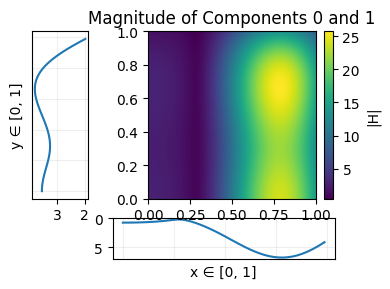

In [9]:
print("Intersection of a and b intersected with c:")
a_intersect_b_intersect_c = fuzzifier.intersection_batch(a_intersect_b, fuzzy_sample_points[2])
Visualizer(a_intersect_b_intersect_c, 100, figsize=(4, 3)).plot(view="magnitude", marginals=True)

## Limitations of using only 1D marginal distributions
2 different distributions could have the same union and intersection.

This results in confusion between component distributions and makes the set ops 1-way.

If pairwise marginals were used, though, this issue would be solved for 2D slices but persist for higher-dimensional distributions' composition

### Union

tf.Tensor(
[[ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]
 [ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.29072747+0.20250645j -0.34403843+0.12887186j -0.37776324+0.0411135j
  -0.38813278-0.05532698j -0.37294817-0.15399696j -0.3318524 -0.24790117j
  -0.

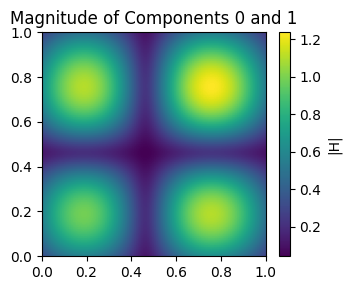

tf.Tensor(
[[ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]
 [ 0.46937656+0.j          0.34300858-0.31954557j  0.03303679-0.4658656j
  -0.29155153-0.36112377j -0.455478  -0.06492681j -0.3733015 +0.26002342j
  -0.09458888+0.43864006j  0.22608061+0.37921104j  0.41603142+0.12106772j
   0.37879446-0.19089922j  0.14358446-0.38854152j -0.15564601-0.37226295j
  -0.35721436-0.16157363j -0.36007458+0.12141535j -0.17470427+0.3231854j
   0.08917465+0.34289825j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.29072747+0.20250645j -0.34403843+0.12887186j -0.37776324+0.0411135j
  -0.38813278-0.05532698j -0.37294817-0.15399696j -0.3318524 -0.24790117j
  -0.2

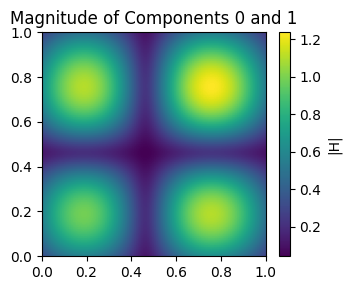

In [10]:
a_union_d = fuzzifier.union_batch(fuzzy_sample_points[0], fuzzy_sample_points[3])
print("Union of fuzzy sample a (bottom-left) with fuzzy sample d (top-right):")
Visualizer(a_union_d, 100, figsize=(4, 3)).plot(view="magnitude", marginals=False)

b_union_c = fuzzifier.union_batch(fuzzy_sample_points[1], fuzzy_sample_points[2])
print("Union of fuzzy sample b (top-left) with fuzzy sample c (bottom-right):")
Visualizer(b_union_c, 100, figsize=(4, 3)).plot(view="magnitude", marginals=False)

### Intersection

tf.Tensor(
[[ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]
 [ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.29072747+0.20250645j -0.34403843+0.12887186j -0.37776324+0.0411135j
  -0.38813278-0.05532698j -0.37294817-0.15399696j -0.3318524 -0.24790117j
  -0.

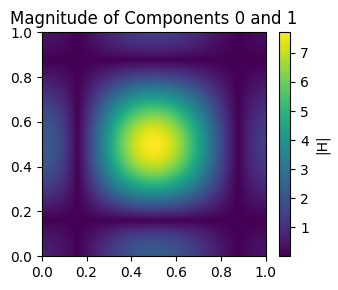

tf.Tensor(
[[ 0.46937656+0.j          0.45421663-0.11598056j  0.40986225-0.22390878j
   0.3395956 -0.31636605j  0.24858351-0.38714588j  0.1434513 -0.43172666j
   0.0317414 -0.44759876j -0.07869385-0.43442j    -0.18031193-0.3939888j
  -0.26645803-0.33004227j -0.3318524 -0.24790117j -0.37294817-0.15399696j
  -0.38813278-0.05532698j -0.37776324+0.0411135j  -0.34403843+0.12887186j
  -0.29072747+0.20250645j]
 [ 0.46937656+0.j          0.34300858-0.31954557j  0.03303679-0.4658656j
  -0.29155153-0.36112377j -0.455478  -0.06492681j -0.3733015 +0.26002342j
  -0.09458888+0.43864006j  0.22608061+0.37921104j  0.41603142+0.12106772j
   0.37879446-0.19089922j  0.14358446-0.38854152j -0.15564601-0.37226295j
  -0.35721436-0.16157363j -0.36007458+0.12141535j -0.17470427+0.3231854j
   0.08917465+0.34289825j]], shape=(2, 16), dtype=complex64)
tf.Tensor(
[[-0.29072747+0.20250645j -0.34403843+0.12887186j -0.37776324+0.0411135j
  -0.38813278-0.05532698j -0.37294817-0.15399696j -0.3318524 -0.24790117j
  -0.2

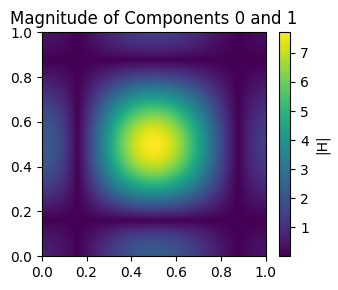

In [11]:
a_intersect_d = fuzzifier.intersection_batch(fuzzy_sample_points[0], fuzzy_sample_points[3])
print("Intersection of fuzzy sample a (bottom-left) with fuzzy sample d (top-right):")
Visualizer(a_intersect_d, 100, figsize=(4, 3)).plot(view="magnitude", marginals=False)

b_intersect_c = fuzzifier.intersection_batch(fuzzy_sample_points[1], fuzzy_sample_points[2])
print("Intersection of fuzzy sample b (top-left) with fuzzy sample c (bottom-right):")
Visualizer(b_intersect_c, 100, figsize=(4, 3)).plot(view="magnitude", marginals=False)